In [1]:
# to handle datasets
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt

# to save the model
import joblib

# to build the model
from sklearn.linear_model import Lasso

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [2]:
# load the train and test set from previous notebook.

X_train = pd.read_csv('data/xtrain.csv')
X_test = pd.read_csv('data/xtest.csv')

X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.333333,0.75,0.521833,0.0,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.0,0.666667,0.750,0.514706,0.327869,0.0,0.0,0.8,0.8,0.333333,0.0,0.666667,0.50,0.50,0.666667,0.666667,0.000000,0.4,0.039511,0.0,0.0,0.339897,0.166448,1.0,0.75,1.0,1.000000,0.422489,0.502179,0.0,0.643070,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.75,0.654206,1.0,0.25,0.126939,0.25,0.50,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.429425,0.0,1.0,1.0,1.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.6,0.666667,0.500,0.058824,0.131148,0.0,0.0,0.9,0.9,0.333333,0.0,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.00,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.50,0.50,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.500000,0.75,0.388581,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.2,0.444444,0.875,0.272059,0.114754,0.0,0.0,0.2,0.5,0.333333,0.0,0.333333,0.75,0.50,0.666667,0.666667,0.666667,1.0,0.116938,0.0,0.0,0.046233,0.125696,1.0,0.75,1.0,1.000000,0.315102,0.000000,0.0,0.294550,0.000000,0.5,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.327103,1.0,0.25,0.279267,0.50,0.50,1.0,0.224037,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.282098,0.0,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.181818,0.4,1.0,0.75,0.6,0.222222,0.250,0.691176,0.967213,0.0,0.0,0.5,0.2,0.333333,0.0,0.333333,0.50,0.25,0.333333,0.666667,0.000000,0.6,0.007264,0.0,0.0,0.352312,0.141408,1.0,0.50,0.0,0.333333,0.359675,0.000000,0.0,0.336216,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.75,0.275019,0.0,0.00,0.000000,0.50,0.50,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,0.0
4,0.000000,0.75,0.495064,0.0,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.6,0.333333,0.500,0.617647,0.934426,0.0,0.0,0.4,0.3,0.333333,0.0,0.333333,0.50,0.25,0.000000,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.299658,0.114566,1.0,1.00,1.0,1.000000,0.477632,0.000000,0.0,0.446478,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.250000,1.0,0.333333,0.8,0.25,0.785047,0.0,0.25,0.177715,0.50,0.25,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [8]:
# load the target
y_train = pd.read_csv('data/ytrain.csv')
y_test = pd.read_csv('data/ytest.csv')

In [7]:
# load pre-selected features

features = pd.read_csv('data/selected_features.csv')
features = features['0'].to_list() 

# reduce the train and test set to the selected features

X_train = X_train[features]
X_test = X_test[features]

In [9]:
# build and train model

lin_model = Lasso(alpha=0.001, random_state=42)

lin_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=42)

In [10]:
# evaluate model

# make predictions for train set
pred = lin_model.predict(X_train)

# determine mse, rmse and r2
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred), squared=False))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lin_model.predict(X_test)

# determine mse, rmse and r2
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred), squared=False))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

print('Average house price: ', int(np.exp(y_train).median()))

train mse: 796165951
train rmse: 28216
train r2: 0.8671261204293631

test mse: 1079913595
test rmse: 32862
test r2: 0.8818040746937663

Average house price:  164500


Text(0.5, 1.0, 'Evaluation of Lasso Predictions')

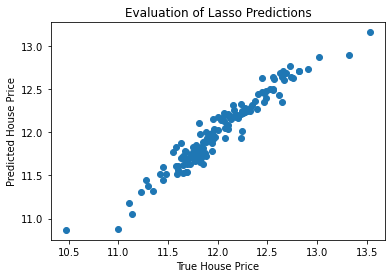

In [11]:
# valuate predictions vs Zreal sale price
plt.scatter(y_test, lin_model.predict(X_test))
plt.xlabel('True House Price')
plt.ylabel('Predicted House Price')
plt.title('Evaluation of Lasso Predictions')

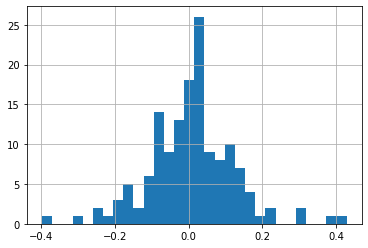

In [14]:
# find and plot distribution of the errors: 
y_test.reset_index(drop=True, inplace=True)
preds = pd.Series(lin_model.predict(X_test))
errors = y_test['SalePrice'] - preds
errors.hist(bins=30)
plt.show()

In [15]:
# save model
joblib.dump(lin_model, 'data/linear_regression.joblib') 

['data/linear_regression.joblib']